In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
%matplotlib inline

In [2]:
#Importing Files
file = 'D:\Data Science\Python\Case Study\Case Study 2 - Credit Card'
file = file.replace('\\','/')
customer = pd.read_csv(file + '/Customer Acqusition.csv')
spend = pd.read_csv(file + '/spend.csv')
repayment = pd.read_csv(file + '/Repayment.csv')

# Dropping the Label/Extra Columns from CSV File
customer.drop('No',axis = 1,inplace = True)
spend.drop('Sl No:',axis = 1,inplace = True)
repayment.drop('SL No:',axis = 1,inplace = True)


In [3]:
customer.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [4]:
#NO Null values and are data type are correct
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [5]:
#Converting Month into Date format
spend['Month'] = spend['Month'].apply(lambda x : pd.to_datetime(x))

In [6]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13


In [7]:
#NO Null values and are data type are correct
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [8]:
#Converting Month into Date format
repayment['Month'] = repayment['Month'].apply(lambda x : pd.to_datetime(x))

In [9]:
repayment.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [10]:
#NO Null values and are data type are correct
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 35.3+ KB


##### Ques 1.
#### a. Replace Age if Less than 18 with mean values

In [11]:
mean_age = customer.Age.mean()
mean_age = int(mean_age)
mean_age

46

In [12]:
customer['Age'] = np.where(customer.Age < 18, mean_age , customer.Age )

#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [13]:
#Merging Files
cust_spend = pd.merge(left = customer, right = spend , how = 'inner', left_on= 'Customer' , right_on = 'Customer' )
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [14]:
cust_spend['Amount'] = np.where(cust_spend['Amount'] > cust_spend['Limit'], cust_spend['Limit'], cust_spend['Amount'])

#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [15]:
cust_repay = pd.merge(left = customer , right = repayment, on = 'Customer')
cust_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [16]:
#Replacing Values
cust_repay['Amount'] = np.where(cust_repay['Amount'] > cust_repay['Limit'], cust_repay['Limit'], cust_repay['Amount'])

#### Ques 2.
#### a. How many distinct customers exist?

In [17]:
customer.Customer.nunique()
#100 Distinct Customers Exist

100

#### b. How many distinct categories exist?

In [18]:
cust_spend.Type.nunique()
#15 Distinct Categories Exist

15

#### c. What is the average monthly spend by customers?

In [19]:
m1 = pd.DataFrame(cust_spend.groupby([cust_spend.Month.dt.year,
                                cust_spend.Month.dt.month]).Amount.mean())
m1.index.names = ['Year','Month']
m1.Amount = m1.Amount.round(2)
m1.head()

Amount
Year Month           
2004 1      159641.37
     2      158605.87
     3      148708.23
     4      139622.26
     5      164398.63

#### d. What is the average monthly repayment by customers?

In [20]:
m2 = pd.DataFrame(cust_repay.groupby([cust_repay.Month.dt.year,
                                      cust_repay.Month.dt.month]).Amount.mean())
m2.index.names = ['Year','Month']
m2.Amount = m2.Amount.round(2)
m2.head()

Amount
Year Month           
2004 1      159971.50
     2      125612.51
     3      177767.95
     4      175632.66
     5      151310.40

#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [21]:
#Getting Repay Amount Data
a1 = pd.DataFrame(cust_repay.groupby([cust_repay.Month.dt.year,cust_repay.Month.dt.month]).Amount.sum())
a1.index.names = ['Year','Month']
#Getting Spend Amount Data
a2 = pd.DataFrame(cust_spend.groupby([cust_spend.Month.dt.year,cust_spend.Month.dt.month]).Amount.sum())
a2.index.names = ['Year','Month']
print(a1.head(),
a2.head())

                 Amount
Year Month             
2004 1      44792020.72
     2       3391537.65
     3       2666519.22
     4       5268979.74
     5       3782759.91                  Amount
Year Month             
2004 1      49009900.46
     2       4440964.34
     3       2081915.27
     4       3909423.34
     5       2301580.86


In [22]:
#Monthly Repayment - Monthly Spend
b1 = a1['Amount'] - a2['Amount']
#Neglecting Negative Amounts
b1 = b1[b1>0]
#Monthly Profit
b2 = (b1*2.9)/100
b2

Year  Month
2004  3         16953.51455
      4         39427.13560
      5         42954.19245
      11         6333.65887
2005  5        212457.32833
      8         36441.30401
      10         4695.15278
      12        23420.43219
2006  1          9560.90096
      2         20259.38782
      4         62399.52939
      5        172945.99152
      7         14388.63478
      9          9854.35254
      10          650.90645
      12         2960.67438
Name: Amount, dtype: float64

#### f. Top 5 Product Types

In [23]:
#Top 5 Product Types
cust_spend.groupby('Type').Amount.sum().sort_values(ascending = False).head(3)

Type
PETRO     31562441.48
CAMERA    29905773.44
FOOD      22894291.60
Name: Amount, dtype: float64

#### g. City with Max Spend

In [24]:
cust_spend.groupby('City').Amount.sum().sort_values(ascending = False).head(1)

City
COCHIN    49378593.0
Name: Amount, dtype: float64

#### h. Age Group Spending More Money

In [25]:
age_group = pd.Series(pd.cut(cust_spend.Age,bins = [18,25,35,60,79],
                   labels = ['Young','Adult','Mid Aged','Senior Citizen']),name = 'Age_group')
age_group.rename('Age_group')
age_group

0       Senior Citizen
1       Senior Citizen
2       Senior Citizen
3       Senior Citizen
4       Senior Citizen
             ...      
1495          Mid Aged
1496          Mid Aged
1497          Mid Aged
1498             Adult
1499          Mid Aged
Name: Age_group, Length: 1500, dtype: category
Categories (4, object): [Young < Adult < Mid Aged < Senior Citizen]

In [26]:
cust_spend = pd.concat([cust_spend,age_group],axis = 1)

In [27]:
cust_spend.groupby('Age_group').Amount.sum().sort_values(ascending = False)

Age_group
Mid Aged          1.235332e+08
Senior Citizen    4.786070e+07
Adult             4.332239e+07
Young             2.520023e+07
Name: Amount, dtype: float64

In [28]:
print('Most Spending Age Group is Middle Age People with Age 35-60',
      cust_spend.groupby('Age_group').Amount.sum().sort_values(ascending = False).head(1))

Most Spending Age Group is Middle Age People with Age 35-60 Age_group
Mid Aged    1.235332e+08
Name: Amount, dtype: float64


#### i. Top 10 customers in terms of repayment

In [29]:
print('Top 10 Customers in Term of Repayment',
      cust_repay.groupby('Customer').Amount.sum().sort_values(ascending = False).head(10))

Top 10 Customers in Term of Repayment Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64


#### Ques 3


In [30]:
# Getting Year from the Date
Year = pd.Series(cust_spend.Month.dt.year,name = 'Year')

In [31]:
cust_spend = pd.concat([cust_spend,Year], axis = 1)

In [32]:
# Calculating Spend City Wise on Yearly Basis
city_wise = pd.DataFrame(cust_spend.groupby(['Year','City','Product']).Amount.sum().reset_index())
city_wise.head()

,Year,City,Product,Amount
0,2004,BANGALORE,Gold,9289878.54
1,2004,BANGALORE,Platimum,1862755.80
2,2004,BANGALORE,Silver,2291866.58
3,2004,BOMBAY,Gold,6987853.53
4,2004,BOMBAY,Platimum,1637282.44


<Figure size 7200x720 with 0 Axes>

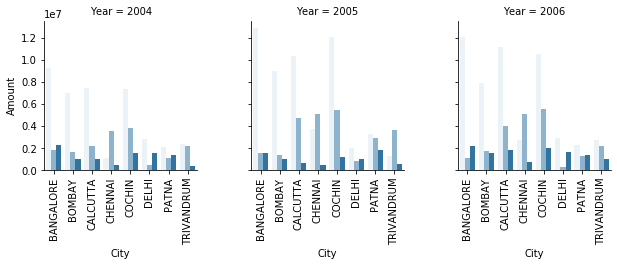

In [33]:
# Plot
plt.figure(figsize=(100,10))
c1 = sns.FacetGrid(data = city_wise,col = 'Year')
c1.map(sns.barplot,'City','Amount','Product',order = ['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI',
       'PATNA', 'TRIVANDRUM'],hue_order = ['Gold', 'Platimum', 'Silver'])
for axes in c1.axes.flat:
    _= axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

#### Ques 4 
a. Monthly comparison of total spends, city wise

In [34]:
# getting month and adding it in Data Frame
Spend_Month = pd.Series(cust_spend.Month.dt.month,name = 'Spend_Month')
cust_spend = pd.concat([cust_spend,Spend_Month],axis =1)

#Grouping BY Month
cust_spend_month = pd.DataFrame(cust_spend.groupby(['Year','Spend_Month','City']).Amount.sum().reset_index())
cust_spend_month.head()

,Year,Spend_Month,City,Amount
0,2004,1,BANGALORE,9907130.77
1,2004,1,BOMBAY,6180410.72
2,2004,1,CALCUTTA,8375533.16
3,2004,1,CHENNAI,4092506.69
4,2004,1,COCHIN,9502443.70


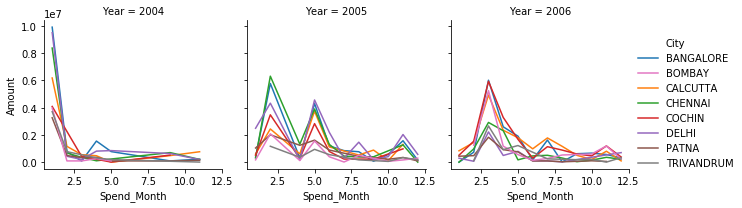

In [35]:
#Plot
c2 = sns.FacetGrid(data = cust_spend_month,col = 'Year')
c2.map(sns.lineplot,'Spend_Month','Amount','City')
c2.add_legend()
plt.show()

 b. Comparison of yearly spend on air tickets

In [36]:
#Grouping BY Month
air_ticket = cust_spend.loc[cust_spend['Type'] == 'AIR TICKET']

air_ticket_spend = pd.DataFrame(air_ticket.groupby(['Year']).Amount.sum().reset_index())
air_ticket_spend.head()

,Year,Amount
0,2004,5077241.35
1,2005,11135167.21
2,2006,6088483.56


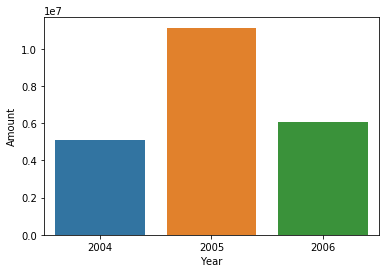

In [37]:
#Plot
sns.barplot(data = air_ticket_spend,x='Year',y='Amount')
plt.show()

 c. Comparison of monthly spend for each product (look for any seasonality
that exists in terms of spend

In [58]:
prod_monthly = pd.DataFrame(cust_spend.groupby(['Year','Spend_Month','Product']).Amount.sum().reset_index())
prod_monthly.head()

,Year,Spend_Month,Product,Amount
0,2004,1,Gold,28837092.88
1,2004,1,Platimum,13237779.76
2,2004,1,Silver,6935027.82
3,2004,2,Gold,3198850.31
4,2004,2,Platimum,710016.00


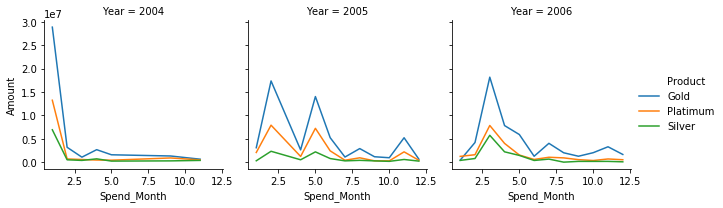

Here the seasonality in terms of Spend is that Spending is More in starting Months of the Year and is lowest in Ending Months


In [39]:
c3 = sns.FacetGrid(data = prod_monthly, col = 'Year')
c3.map(sns.lineplot,'Spend_Month','Amount','Product')
c3.add_legend()
plt.show()
print('Here the seasonality in terms of Spend is that Spending is More in starting Months of the Year and is lowest in Ending Months')

#### Ques 5

In [42]:
k1 = pd.DataFrame(cust_repay.groupby([cust_repay.Month.dt.year,
                                      cust_repay.Month.dt.month,'City','Product']).Amount.sum())

In [116]:
def funcc(Prod, Time):
    if Time == 'yearly':
        k3 = pd.DataFrame(cust_repay[cust_repay.Product == Prod].groupby(['Customer',cust_repay.Month.dt.year,'City'
                                      ]).Amount.sum().reset_index().sort_values(by = 'Amount',ascending = False))
        k3.columns = ['Customer','Year','City','Amount']
    else :
        k3 = pd.DataFrame(cust_repay[cust_repay.Product == Prod].groupby(['Customer',cust_repay.Month.dt.month,'City'
                                      ]).Amount.sum().reset_index().sort_values(by = 'Amount',ascending = False))
        k3.columns = ['Customer','Month','City','Amount']
    return k3.nlargest(10,'Amount')

In [124]:
Prod = str(input('Enter the Product Category From : Gold/Platimum/Silver :'))
Time = str(input('Enter the Time Period : yearly/monthly :'))


Enter the Product Category From : Gold/Platimum/Silver :Platimum
Enter the Time Period : yearly/monthly :monthly


In [125]:
funcc(Prod,Time)

,Customer,Month,City,Amount
114,A41,1,COCHIN,2089998.54
118,A41,5,COCHIN,1999863.05
106,A40,1,CALCUTTA,1749083.51
94,A39,5,TRIVANDRUM,1668976.58
80,A38,1,CHENNAI,1655584.31
90,A39,1,TRIVANDRUM,1565119.57
208,A56,3,CHENNAI,1500854.63
109,A40,5,CALCUTTA,1401293.97
81,A38,2,CHENNAI,1365681.76
91,A39,2,TRIVANDRUM,1212860.65
